In [24]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings
warnings.simplefilter('ignore')
%run -i 'functions.py'

# JFK Weather in 2019

In [94]:
pd.set_option('display.max_columns', None)
df= pd.read_csv('jfkweather.csv')

We are going to clean and organize the data and columns into a legible dataset which will be useful for visuals and models. 

## Cleaning the dataset.

In [95]:
df['date']= pd.date_range(start='1/1/2019', end='12/31/2019')

In [96]:
df['date'] = pd.to_datetime(df['date'])

In [97]:
cols = list(df.columns)
cols = [cols[-1]] + cols[:-1]
df = df[cols]

In [98]:
df['season'] = df.date.map(season_of_date)

In [99]:
df['month'] = df['date'].dt.month

In [100]:
df['date'] = pd.to_datetime(df['date'])

In [101]:
#df = df.set_index('date')

In [102]:
df['precipAccumulation'].fillna(0,inplace=True)

After giving the dataset a date column and making a column for seasons we also filled the null values in 'PrecipAccumulation' as 318 null vlaues were days no snow accumulated. In addition, I have not the date the index as I will need to search for a specifc date later on. 

In [45]:
df['icon'].value_counts()

rain                 167
partly-cloudy-day    106
clear-day             75
snow                  10
wind                   5
cloudy                 2
Name: icon, dtype: int64

I will only use the column icon as an identifier of whethere there was precipitation on the specific day. The column 'PrecipType' only returns snow and rain and it is missleading for clear days.

In [46]:
df['precipType'].value_counts()

rain    317
snow     47
Name: precipType, dtype: int64

In [131]:
#df[(df['precipType'] =='snow' ) & (df['icon'] == 'snow')] 


# Visuals

In [16]:
rain = df.groupby('season').agg({'precipProbability': ['mean']})
rain

,precipProbability
,mean
season,
1,0.389667
2,0.446854
3,0.372553
4,0.577500


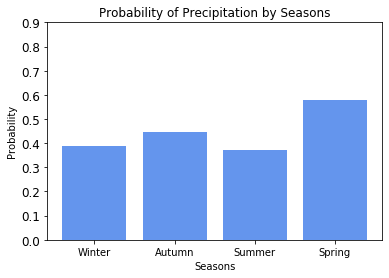

In [20]:
avgrain(rain)

As we can see, it is evident there is a higher precipitation of rain in the Spring time, with Winter and Summer fairly close. It will be interesting when we look into California.

In [134]:
df['avgtemp']= df[['temperatureMax','temperatureMin']].mean(axis=1)

In [135]:
temp = df.groupby('season').agg({'avgtemp': ['mean']})
temp

,avgtemp
,mean
season,
1,35.409500
2,50.814944
3,75.099255
4,57.277717


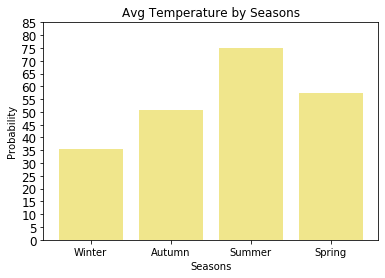

In [23]:
avgtemp(temp)

Pretty obvious the average temperatures based on seasons may sense.

# Analysis of Weather Delays

Based on the JFK notebook, we identified the 5 flight dates in which had the longest delay due to weather. 


In [107]:
airport= pd.read_csv('final1.csv')
airport.drop(['Unnamed: 0'],axis=1,inplace=True)
JFK = airport[airport['ORIGIN_STATE_ABR'] == 'NY']

In [108]:
JFK[JFK['WEATHER_DELAY'] > 0].groupby(['FL_DATE']).size().nlargest()

FL_DATE
2019-01-21    11
2019-02-12    10
2019-07-17     8
2019-07-22     8
2019-12-18     8
dtype: int64

### 2019-01-21

There were a total 33 flights that day, yet only 11 flights were delayed on this date in JFK to LAX.

In [84]:
JFK[(JFK['FL_DATE'] =='2019-01-21') & (JFK['WEATHER_DELAY'] > 0)].groupby(['OP_UNIQUE_CARRIER']).size()

OP_UNIQUE_CARRIER
AA    2
AS    2
B6    2
DL    5
dtype: int64

In [86]:
JFK[(JFK['FL_DATE'] =='2019-01-21') & (JFK['WEATHER_DELAY'] > 0)].groupby(['OP_UNIQUE_CARRIER']).agg({'WEATHER_DELAY': ['sum']})

,WEATHER_DELAY
,sum
OP_UNIQUE_CARRIER,
AA,82.0
AS,104.0
B6,30.0
DL,216.0


Interesting enough, Delta had thelongest delays due to weather condition and the airline had the most dleayed flights that day. 

In [68]:
JFK[(JFK['FL_DATE'] =='2019-01-21') & (JFK['WEATHER_DELAY'] > 0)].sort_values(by=['DEP_TIME'])


,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,OP_UNIQUE_CARRIER,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,ORIGIN_STATE_NM,DEST_AIRPORT_ID,DEST,DEST_CITY_NAME,DEST_STATE_ABR,DEST_STATE_NM,DEP_TIME,DEP_DELAY,ARR_TIME,ARR_DELAY,CANCELLED,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,delayed,ontime,cancel,class,delay_carrier,delay_weather,delay_nas,delay_security,delay_late_aircraft
990,1,1,21,1,2019-01-21,B6,23,12478,JFK,"New York, NY",NY,New York,12892,LAX,"Los Angeles, CA",CA,California,552.0,12.0,935.0,31.0,0.0,375.0,2475.0,0.0,12.0,19.0,0.0,0.0,True,False,False,2,False,True,True,False,False
546,1,1,21,1,2019-01-21,DL,1710,12478,JFK,"New York, NY",NY,New York,12892,LAX,"Los Angeles, CA",CA,California,820.0,80.0,1208.0,109.0,0.0,369.0,2475.0,0.0,80.0,29.0,0.0,0.0,True,False,False,2,False,True,True,False,False
748,1,1,21,1,2019-01-21,AS,1399,12478,JFK,"New York, NY",NY,New York,12892,LAX,"Los Angeles, CA",CA,California,844.0,89.0,1256.0,136.0,0.0,376.0,2475.0,0.0,89.0,47.0,0.0,0.0,True,False,False,2,False,True,True,False,False
995,1,1,21,1,2019-01-21,B6,323,12478,JFK,"New York, NY",NY,New York,12892,LAX,"Los Angeles, CA",CA,California,942.0,18.0,1346.0,47.0,0.0,376.0,2475.0,0.0,18.0,29.0,0.0,0.0,True,False,False,2,False,True,True,False,False
1605,1,1,21,1,2019-01-21,AA,42,12478,JFK,"New York, NY",NY,New York,12892,LAX,"Los Angeles, CA",CA,California,1018.0,78.0,1416.0,98.0,0.0,368.0,2475.0,0.0,78.0,20.0,0.0,0.0,True,False,False,2,False,True,True,False,False
238,1,1,21,1,2019-01-21,AA,331,12478,JFK,"New York, NY",NY,New York,12892,LAX,"Los Angeles, CA",CA,California,1104.0,4.0,1438.0,18.0,0.0,365.0,2475.0,0.0,4.0,14.0,0.0,0.0,True,False,False,2,False,True,True,False,False
744,1,1,21,1,2019-01-21,AS,31,12478,JFK,"New York, NY",NY,New York,12892,LAX,"Los Angeles, CA",CA,California,1315.0,15.0,1650.0,20.0,0.0,370.0,2475.0,0.0,15.0,5.0,0.0,0.0,True,False,False,2,False,True,True,False,False
548,1,1,21,1,2019-01-21,DL,1762,12478,JFK,"New York, NY",NY,New York,12892,LAX,"Los Angeles, CA",CA,California,1325.0,95.0,1649.0,95.0,0.0,364.0,2475.0,65.0,30.0,0.0,0.0,0.0,True,False,False,2,True,True,False,False,False
547,1,1,21,1,2019-01-21,DL,1722,12478,JFK,"New York, NY",NY,New York,12892,LAX,"Los Angeles, CA",CA,California,1611.0,46.0,2008.0,63.0,0.0,359.0,2475.0,0.0,46.0,17.0,0.0,0.0,True,False,False,2,False,True,True,False,False
1183,1,1,21,1,2019-01-21,DL,41,12478,JFK,"New York, NY",NY,New York,12892,LAX,"Los Angeles, CA",CA,California,1744.0,45.0,2124.0,64.0,0.0,361.0,2475.0,0.0,45.0,19.0,0.0,0.0,True,False,False,2,False,True,True,False,False


In [110]:
df[df['date'] == '2019-01-21']

,date,time,summary,icon,sunriseTime,sunsetTime,moonPhase,precipIntensity,precipIntensityMax,precipIntensityMaxTime,precipProbability,precipType,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,dewPoint,humidity,pressure,windSpeed,windGust,windGustTime,windBearing,cloudCover,uvIndex,uvIndexTime,visibility,ozone,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime,precipAccumulation,season,month
20,2019-01-21,1547960400,Rain in the morning and afternoon.,rain,1547986500,1548021540,0.49,0.0388,0.1426,1547967480,0.99,rain,49.08,1547999520,4.94,1548074460,43.07,1547999100,-16.08,1548075540,28.09,0.81,999.2,17.38,42.66,1548036960,343,0.81,2,1548004860,7.55,316.0,15.54,1548043200,49.08,1547999520,-2.57,1548043200,43.07,1547999100,0.0,1,1


 - 	precipIntensityMax is the maximum value in inches of liquid given on that day

According to the weather data on this date, it did rain on Jan21,2019 in the morning and afternoon. There was a 99 chance of rain on this day. The percentage of cloud coverage on the day is also high at 81%.In addition, on this day the visibity was only 7.55 which indicates one is only able to visibly see 7.55 miles ahead and it shows in the JFK dataframe the NAS caused a heavy delay aswell. Wind gust value is also pretty high at a 42.66 mph which is defined as teh sudden increase of wind speed.

### 2019-02-12

There were 36 flights on this day and only 8 of them were delayed. It seems that Delta Airlines had the most delayed flights out of all airlines. 

In [111]:
JFK[(JFK['FL_DATE'] =='2019-02-12') & (JFK['WEATHER_DELAY'] > 0)].groupby(['OP_UNIQUE_CARRIER']).size()

OP_UNIQUE_CARRIER
AA    2
AS    1
B6    2
DL    5
dtype: int64

In [112]:
JFK[(JFK['FL_DATE'] =='2019-02-12') & (JFK['WEATHER_DELAY'] > 0)].groupby(['OP_UNIQUE_CARRIER']).agg({'WEATHER_DELAY': ['sum']})

,WEATHER_DELAY
,sum
OP_UNIQUE_CARRIER,
AA,69.0
AS,154.0
B6,382.0
DL,193.0


Although Delta Airlines had the most flights delayed, the two JetBlue flights had the longest delay times. 

In [114]:
JFK[(JFK['FL_DATE'] =='2019-02-12') & (JFK['WEATHER_DELAY'] > 0)].sort_values(by=['DEP_TIME'])

,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,OP_UNIQUE_CARRIER,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,ORIGIN_STATE_NM,DEST_AIRPORT_ID,DEST,DEST_CITY_NAME,DEST_STATE_ABR,DEST_STATE_NM,DEP_TIME,DEP_DELAY,ARR_TIME,ARR_DELAY,CANCELLED,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,delayed,ontime,cancel,class,delay_carrier,delay_weather,delay_nas,delay_security,delay_late_aircraft
3390,1,2,12,2,2019-02-12,B6,523,12478,JFK,"New York, NY",NY,New York,12892,LAX,"Los Angeles, CA",CA,California,1247.0,36.0,1632.0,55.0,0.0,349.0,2475.0,0.0,36.0,19.0,0.0,0.0,True,False,False,2,False,True,True,False,False
3626,1,2,12,2,2019-02-12,AS,1409,12478,JFK,"New York, NY",NY,New York,12892,LAX,"Los Angeles, CA",CA,California,1335.0,160.0,1704.0,154.0,0.0,348.0,2475.0,0.0,154.0,0.0,0.0,0.0,True,False,False,2,False,True,False,False,False
4039,1,2,12,2,2019-02-12,DL,305,12478,JFK,"New York, NY",NY,New York,12892,LAX,"Los Angeles, CA",CA,California,1412.0,17.0,1857.0,91.0,0.0,353.0,2475.0,0.0,17.0,74.0,0.0,0.0,True,False,False,2,False,True,True,False,False
3248,1,2,12,2,2019-02-12,AA,341,12478,JFK,"New York, NY",NY,New York,12892,LAX,"Los Angeles, CA",CA,California,1443.0,43.0,1842.0,81.0,0.0,351.0,2475.0,0.0,27.0,38.0,0.0,16.0,True,False,False,2,False,True,True,False,True
4045,1,2,12,2,2019-02-12,DL,1722,12478,JFK,"New York, NY",NY,New York,12892,LAX,"Los Angeles, CA",CA,California,1552.0,27.0,1955.0,50.0,0.0,343.0,2475.0,0.0,27.0,23.0,0.0,0.0,True,False,False,2,False,True,True,False,False
3388,1,2,12,2,2019-02-12,B6,423,12478,JFK,"New York, NY",NY,New York,12892,LAX,"Los Angeles, CA",CA,California,1650.0,346.0,2041.0,371.0,0.0,353.0,2475.0,0.0,346.0,25.0,0.0,0.0,True,False,False,2,False,True,True,False,False
2728,1,2,12,2,2019-02-12,AA,133,12478,JFK,"New York, NY",NY,New York,12892,LAX,"Los Angeles, CA",CA,California,1802.0,42.0,2156.0,64.0,0.0,333.0,2475.0,0.0,42.0,22.0,0.0,0.0,True,False,False,2,False,True,True,False,False
4038,1,2,12,2,2019-02-12,DL,41,12478,JFK,"New York, NY",NY,New York,12892,LAX,"Los Angeles, CA",CA,California,1815.0,76.0,2121.0,61.0,0.0,336.0,2475.0,1.0,26.0,0.0,0.0,34.0,True,False,False,2,True,True,False,False,True
4053,1,2,12,2,2019-02-12,DL,2001,12478,JFK,"New York, NY",NY,New York,12892,LAX,"Los Angeles, CA",CA,California,1936.0,91.0,2305.0,95.0,0.0,338.0,2475.0,0.0,91.0,4.0,0.0,0.0,True,False,False,2,False,True,True,False,False
4052,1,2,12,2,2019-02-12,DL,1987,12478,JFK,"New York, NY",NY,New York,12892,LAX,"Los Angeles, CA",CA,California,2205.0,40.0,118.0,32.0,0.0,350.0,2475.0,0.0,32.0,0.0,0.0,0.0,True,False,False,2,False,True,False,False,False


In [115]:
df[df['date']== '2019-02-12']

,date,time,summary,icon,sunriseTime,sunsetTime,moonPhase,precipIntensity,precipIntensityMax,precipIntensityMaxTime,precipProbability,precipType,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,dewPoint,humidity,pressure,windSpeed,windGust,windGustTime,windBearing,cloudCover,uvIndex,uvIndexTime,visibility,ozone,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime,precipAccumulation,season,month
42,2019-02-12,1549861200,Overcast throughout the day.,cloudy,1549886100,1549923960,0.22,0.0004,0.002,1549900680,0.19,snow,38.15,1549917000,29.54,1549976400,33.98,1549917480,18.71,1549976400,19.14,0.57,1026.9,5.95,9.3,1549908720,28,0.93,3,1549904040,9.706,264.3,28.48,1549870020,38.15,1549917000,22.34,1549869120,33.98,1549917480,0.05,1,2


On this date there was a low chance of precipitation at 19%. In addition, it was mainly cloudy throughout the day with a cloud coverage of of 93%. It seems there was a bit of snow on this day as the 'precipAccumulation' column indicates .05 inches of snow was expected to occur. Wing gust and wind speed is relatively low indicated wind was not a factor of the delay.

### 2019-07-17

In [130]:
JFK[(JFK['FL_DATE'] =='2019-07-17')].groupby(['OP_UNIQUE_CARRIER']).size()

OP_UNIQUE_CARRIER
AA    10
AS     5
B6    10
DL    10
dtype: int64

On this day there were about 35 flights but only 8 flights were delayed. It seems that American Airlines had the most delayed flights. 

In [116]:
JFK[(JFK['FL_DATE'] =='2019-07-17') & (JFK['WEATHER_DELAY'] > 0)].groupby(['OP_UNIQUE_CARRIER']).size()

OP_UNIQUE_CARRIER
AA    4
B6    2
DL    2
dtype: int64

In [117]:
JFK[(JFK['FL_DATE'] =='2019-07-17') & (JFK['WEATHER_DELAY'] > 0)].groupby(['OP_UNIQUE_CARRIER']).agg({'WEATHER_DELAY': ['sum']})

,WEATHER_DELAY
,sum
OP_UNIQUE_CARRIER,
AA,354.0
B6,408.0
DL,373.0


Althought American Airlines had twice as many delayed flights are JetBlue, JetBlue had the most delay times due to weather.

In [118]:
JFK[(JFK['FL_DATE'] =='2019-07-17') & (JFK['WEATHER_DELAY'] > 0)].sort_values(by=['DEP_TIME'])

,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,OP_UNIQUE_CARRIER,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,ORIGIN_STATE_NM,DEST_AIRPORT_ID,DEST,DEST_CITY_NAME,DEST_STATE_ABR,DEST_STATE_NM,DEP_TIME,DEP_DELAY,ARR_TIME,ARR_DELAY,CANCELLED,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,delayed,ontime,cancel,class,delay_carrier,delay_weather,delay_nas,delay_security,delay_late_aircraft
14547,3,7,17,3,2019-07-17,B6,1723,12478,JFK,"New York, NY",NY,New York,12892,LAX,"Los Angeles, CA",CA,California,7.0,158.0,344.0,173.0,0.0,321.0,2475.0,120.0,38.0,15.0,0.0,0.0,True,False,False,2,True,True,True,False,False
13634,3,7,17,3,2019-07-17,AA,56,12478,JFK,"New York, NY",NY,New York,12892,LAX,"Los Angeles, CA",CA,California,16.0,151.0,329.0,149.0,0.0,312.0,2475.0,0.0,55.0,0.0,0.0,94.0,True,False,False,2,False,True,False,False,True
12934,3,7,17,3,2019-07-17,AA,185,12478,JFK,"New York, NY",NY,New York,12892,LAX,"Los Angeles, CA",CA,California,100.0,255.0,359.0,240.0,0.0,310.0,2475.0,139.0,101.0,0.0,0.0,0.0,True,False,False,2,True,True,False,False,False
13110,3,7,17,3,2019-07-17,AA,302,12478,JFK,"New York, NY",NY,New York,12892,LAX,"Los Angeles, CA",CA,California,203.0,453.0,444.0,413.0,0.0,314.0,2475.0,0.0,47.0,0.0,0.0,366.0,True,False,False,2,False,True,False,False,True
14546,3,7,17,3,2019-07-17,B6,1623,12478,JFK,"New York, NY",NY,New York,12892,LAX,"Los Angeles, CA",CA,California,232.0,422.0,517.0,373.0,0.0,319.0,2475.0,0.0,370.0,0.0,0.0,3.0,True,False,False,2,False,True,False,False,True
13372,3,7,17,3,2019-07-17,DL,454,12478,JFK,"New York, NY",NY,New York,12892,LAX,"Los Angeles, CA",CA,California,2300.0,85.0,154.0,67.0,0.0,300.0,2475.0,0.0,54.0,0.0,0.0,13.0,True,False,False,2,False,True,False,False,True
13079,3,7,17,3,2019-07-17,AA,300,12478,JFK,"New York, NY",NY,New York,12892,LAX,"Los Angeles, CA",CA,California,2325.0,205.0,232.0,191.0,0.0,308.0,2475.0,0.0,151.0,0.0,0.0,40.0,True,False,False,2,False,True,False,False,True
13370,3,7,17,3,2019-07-17,DL,447,12478,JFK,"New York, NY",NY,New York,12892,LAX,"Los Angeles, CA",CA,California,2355.0,340.0,259.0,319.0,0.0,299.0,2475.0,0.0,319.0,0.0,0.0,0.0,True,False,False,2,False,True,False,False,False


In [51]:
df[df['date']== '2019-07-17']

,date,time,summary,icon,sunriseTime,sunsetTime,moonPhase,precipIntensity,precipIntensityMax,precipIntensityMaxTime,precipProbability,precipType,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,dewPoint,humidity,pressure,windSpeed,windGust,windGustTime,windBearing,cloudCover,uvIndex,uvIndexTime,visibility,ozone,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime,precipAccumulation,season,month
197,2019-07-17,1563249600,Humid and partly cloudy throughout the day.,partly-cloudy-day,1563269940,1563323160,0.5,0.0006,0.0021,1563310860,0.18,rain,87.36,1563296880,75.17,1563359760,89.58,1563303120,77.16,1563351060,66.85,0.67,1017.6,9.43,24.67,1563316560,198,0.48,8,1563296520,10.0,308.3,70.1,1563270840,87.36,1563296880,71.03,1563270840,89.58,1563303120,0.0,3,7


On this date the cloud coverage was about 50% which is not too bad included a low chance of rain throughout the day. 

### 2019-07-22

In [132]:
JFK[(JFK['FL_DATE'] =='2019-07-22')].groupby(['OP_UNIQUE_CARRIER']).size()

OP_UNIQUE_CARRIER
AA    10
AS     5
B6    10
DL    10
dtype: int64

On this date there were 35 flights with destination to LAX. Out of the 35 flights 8 were delayed due to weather. 

In [119]:
JFK[(JFK['FL_DATE'] =='2019-07-22') & (JFK['WEATHER_DELAY'] > 0)].groupby(['OP_UNIQUE_CARRIER']).size()

OP_UNIQUE_CARRIER
AA    3
B6    2
DL    3
dtype: int64

In [125]:
JFK[(JFK['FL_DATE'] =='2019-07-22') & (JFK['WEATHER_DELAY'] > 0)].groupby(['OP_UNIQUE_CARRIER']).agg({'WEATHER_DELAY': ['sum']})

,WEATHER_DELAY
,sum
OP_UNIQUE_CARRIER,
AA,124.0
B6,320.0
DL,407.0


It is evident Delta Airlines had the longest delays due to weather condititions compared to the other airlines.

In [121]:
JFK[(JFK['FL_DATE'] =='2019-07-22') & (JFK['WEATHER_DELAY'] > 0)].sort_values(by=['DEP_TIME'])

,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,OP_UNIQUE_CARRIER,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,ORIGIN_STATE_NM,DEST_AIRPORT_ID,DEST,DEST_CITY_NAME,DEST_STATE_ABR,DEST_STATE_NM,DEP_TIME,DEP_DELAY,ARR_TIME,ARR_DELAY,CANCELLED,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,delayed,ontime,cancel,class,delay_carrier,delay_weather,delay_nas,delay_security,delay_late_aircraft
13115,3,7,22,1,2019-07-22,AA,302,12478,JFK,"New York, NY",NY,New York,12892,LAX,"Los Angeles, CA",CA,California,2022.0,112.0,2351.0,120.0,0.0,332.0,2475.0,0.0,99.0,8.0,0.0,13.0,True,False,False,2,False,True,True,False,True
13348,3,7,22,1,2019-07-22,DL,427,12478,JFK,"New York, NY",NY,New York,12892,LAX,"Los Angeles, CA",CA,California,2058.0,103.0,45.0,110.0,0.0,323.0,2475.0,0.0,103.0,7.0,0.0,0.0,True,False,False,2,False,True,True,False,False
13084,3,7,22,1,2019-07-22,AA,300,12478,JFK,"New York, NY",NY,New York,12892,LAX,"Los Angeles, CA",CA,California,2144.0,104.0,113.0,112.0,0.0,321.0,2475.0,0.0,12.0,8.0,0.0,92.0,True,False,False,2,False,True,True,False,True
12939,3,7,22,1,2019-07-22,AA,185,12478,JFK,"New York, NY",NY,New York,12892,LAX,"Los Angeles, CA",CA,California,2159.0,74.0,138.0,99.0,0.0,323.0,2475.0,0.0,13.0,25.0,0.0,61.0,True,False,False,2,False,True,True,False,True
13352,3,7,22,1,2019-07-22,DL,454,12478,JFK,"New York, NY",NY,New York,12892,LAX,"Los Angeles, CA",CA,California,2229.0,54.0,142.0,55.0,0.0,321.0,2475.0,0.0,8.0,1.0,0.0,46.0,True,False,False,2,False,True,True,False,True
14706,3,7,22,1,2019-07-22,B6,1523,12478,JFK,"New York, NY",NY,New York,12892,LAX,"Los Angeles, CA",CA,California,2241.0,316.0,132.0,273.0,0.0,318.0,2475.0,15.0,258.0,0.0,0.0,0.0,True,False,False,2,True,True,False,False,False
14707,3,7,22,1,2019-07-22,B6,1623,12478,JFK,"New York, NY",NY,New York,12892,LAX,"Los Angeles, CA",CA,California,2255.0,205.0,221.0,197.0,0.0,326.0,2475.0,0.0,62.0,0.0,0.0,135.0,True,False,False,2,False,True,False,False,True
13350,3,7,22,1,2019-07-22,DL,447,12478,JFK,"New York, NY",NY,New York,12892,LAX,"Los Angeles, CA",CA,California,2332.0,317.0,236.0,296.0,0.0,310.0,2475.0,0.0,296.0,0.0,0.0,0.0,True,False,False,2,False,True,False,False,False


In [136]:
df[df['date']== '2019-07-22']

,date,time,summary,icon,sunriseTime,sunsetTime,moonPhase,precipIntensity,precipIntensityMax,precipIntensityMaxTime,precipProbability,precipType,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,dewPoint,humidity,pressure,windSpeed,windGust,windGustTime,windBearing,cloudCover,uvIndex,uvIndexTime,visibility,ozone,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime,precipAccumulation,season,month,avgtemp
202,2019-07-22,1563681600,Rain overnight.,rain,1563702180,1563754920,0.66,0.0015,0.0073,1563749880,0.32,rain,97.74,1563744060,78.17,1563787800,109.49,1563733260,81.57,1563788040,75.46,0.66,1008.9,10.15,14.76,1563746340,256,0.34,8,1563725040,9.912,301.9,80.1,1563701760,97.74,1563744060,87.86,1563701940,109.49,1563733260,0.0,3,7,88.92


On this summer day it seems the delay was due to rain. ALthough chance of precipitation was about 32% it seems to have been raining on and off throughout the day according to the departure times the flights early in the day and at night seem to have the most delays. Visibility is pretty normal at almost 10 miles and cloud coverage indicated party clear skys.

### 2019-12-18

In [137]:
JFK[(JFK['FL_DATE'] =='2019-12-18')].groupby(['OP_UNIQUE_CARRIER']).size()

OP_UNIQUE_CARRIER
AA    11
AS     5
B6    12
DL    10
dtype: int64

On this date in December, there were 38 flights, a few more than other days. It seems on this day only two airlines out of the four in whih fly to LAX were delayed. 

In [122]:
JFK[(JFK['FL_DATE'] =='2019-12-18') & (JFK['WEATHER_DELAY'] > 0)].groupby(['OP_UNIQUE_CARRIER']).size()

OP_UNIQUE_CARRIER
AA    5
DL    3
dtype: int64

In [123]:
JFK[(JFK['FL_DATE'] =='2019-12-18') & (JFK['WEATHER_DELAY'] > 0)].groupby(['OP_UNIQUE_CARRIER']).agg({'WEATHER_DELAY': ['sum']})

,WEATHER_DELAY
,sum
OP_UNIQUE_CARRIER,
AA,665.0
DL,134.0


American Airlines as the longest delay time we have seen in comparison to the other dates. This date is also a week before Christmas which can indicate many people were traveling before the holidays. 

In [124]:
JFK[(JFK['FL_DATE'] =='2019-12-18') & (JFK['WEATHER_DELAY'] > 0)].sort_values(by=['DEP_TIME'])

,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,OP_UNIQUE_CARRIER,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,ORIGIN_STATE_NM,DEST_AIRPORT_ID,DEST,DEST_CITY_NAME,DEST_STATE_ABR,DEST_STATE_NM,DEP_TIME,DEP_DELAY,ARR_TIME,ARR_DELAY,CANCELLED,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,delayed,ontime,cancel,class,delay_carrier,delay_weather,delay_nas,delay_security,delay_late_aircraft
25063,4,12,18,3,2019-12-18,AA,306,12478,JFK,"New York, NY",NY,New York,12892,LAX,"Los Angeles, CA",CA,California,943.0,1003.0,1337.0,1017.0,0.0,332.0,2475.0,813.0,190.0,14.0,0.0,0.0,True,False,False,2,True,True,True,False,False
23928,4,12,18,3,2019-12-18,DL,428,12478,JFK,"New York, NY",NY,New York,12892,LAX,"Los Angeles, CA",CA,California,1730.0,35.0,2154.0,94.0,0.0,330.0,2475.0,0.0,35.0,59.0,0.0,0.0,True,False,False,2,False,True,True,False,False
23929,4,12,18,3,2019-12-18,DL,447,12478,JFK,"New York, NY",NY,New York,12892,LAX,"Los Angeles, CA",CA,California,1827.0,27.0,2150.0,20.0,0.0,329.0,2475.0,0.0,20.0,0.0,0.0,0.0,True,False,False,2,False,True,False,False,False
25032,4,12,18,3,2019-12-18,AA,302,12478,JFK,"New York, NY",NY,New York,12892,LAX,"Los Angeles, CA",CA,California,1956.0,86.0,6.0,116.0,0.0,343.0,2475.0,0.0,86.0,30.0,0.0,0.0,True,False,False,2,False,True,True,False,False
23741,4,12,18,3,2019-12-18,AA,117,12478,JFK,"New York, NY",NY,New York,12892,LAX,"Los Angeles, CA",CA,California,2216.0,166.0,159.0,167.0,0.0,342.0,2475.0,0.0,166.0,1.0,0.0,0.0,True,False,False,2,False,True,True,False,False
25004,4,12,18,3,2019-12-18,AA,300,12478,JFK,"New York, NY",NY,New York,12892,LAX,"Los Angeles, CA",CA,California,2217.0,107.0,203.0,124.0,0.0,336.0,2475.0,0.0,106.0,17.0,0.0,1.0,True,False,False,2,False,True,True,False,True
23927,4,12,18,3,2019-12-18,DL,427,12478,JFK,"New York, NY",NY,New York,12892,LAX,"Los Angeles, CA",CA,California,2241.0,196.0,222.0,203.0,0.0,331.0,2475.0,0.0,79.0,7.0,0.0,117.0,True,False,False,2,False,True,True,False,True
23828,4,12,18,3,2019-12-18,AA,185,12478,JFK,"New York, NY",NY,New York,12892,LAX,"Los Angeles, CA",CA,California,2335.0,125.0,259.0,117.0,0.0,339.0,2475.0,0.0,117.0,0.0,0.0,0.0,True,False,False,2,False,True,False,False,False


In [54]:
df[df['date']== '2019-12-18']

,date,time,summary,icon,sunriseTime,sunsetTime,moonPhase,precipIntensity,precipIntensityMax,precipIntensityMaxTime,precipProbability,precipType,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,dewPoint,humidity,pressure,windSpeed,windGust,windGustTime,windBearing,cloudCover,uvIndex,uvIndexTime,visibility,ozone,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime,precipAccumulation,season,month
351,2019-12-18,1576558800,Rain until evening.,rain,1576584840,1576618260,0.71,0.038,0.1015,1576569600,1.0,rain,36.24,1576596240,32.87,1576666200,27.79,1576601820,22.23,1576666080,32.54,0.94,1010.4,12.29,24.75,1576586460,21,1.0,1,1576601460,6.471,293.8,32.07,1576567020,36.24,1576596240,22.91,1576569120,27.79,1576601820,0.0,2,12


According to the weather data, on this date it rained nearly all day. The chance of rain is 100%, which is the highest probability of precipitation amoung the other delayed dates. In addition, visibily is the lowest and cloud coverage is the highest value in comparison to the first four dates. Visibility at 6.47, indicating it is only visibly about 6 miles ahead when the maximum is 10 miles. Cloud coverage is at a full 100%, signifying clouds completely covered the sky this day.  